### BUDGET ANALYSIS FOR HAROLD - Pani Maddi ###

1. The **categories** had subcategories included
2. For the **HAROLD's expenses pie chart** i only included the high level categories

In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')

In [414]:
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [416]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

# Get institutions
client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'ShC9aTNuPpMTjOO',
 'total': 11448}

In [417]:
institution_id = "ins_109508"

### 2. Generate a public token

In [418]:
# YOUR CODE HERE
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(institution_id, ['transactions','income','assets'])

print(f"tkn_response : {create_tkn_response}")

tkn_response : {'public_token': 'public-sandbox-07ad1aa7-c1dd-4e43-929b-922072888c8a', 'request_id': 'Ma4jfoYWYkxtnfk'}


### 3. Exchange the public token for an access token

In [419]:
# YOUR CODE HERE
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
print(f"exchange_response : {exchange_response}")

# Store access token as variable
access_token = exchange_response['access_token']
print(f"access_token : {access_token}")

item_id = exchange_response['item_id']
print(f"item_id : {item_id}")

print(f"institution_id : {institution_id}")

request_id = exchange_response['request_id']
print(f"request_id : {request_id}")


exchange_response : {'access_token': 'access-sandbox-f0a9e720-c698-45a6-8d54-2b45cd9e09c7', 'item_id': 'pnw3y6VzEXCLPq5xMQKVU96xQexbAViL4Ev6P', 'request_id': 'YGliV7Y490ZXDia'}
access_token : access-sandbox-f0a9e720-c698-45a6-8d54-2b45cd9e09c7
item_id : pnw3y6VzEXCLPq5xMQKVU96xQexbAViL4Ev6P
institution_id : ins_109508
request_id : YGliV7Y490ZXDia


### 4. Fetch Accounts

In [420]:
# YOUR CODE HERE
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'AENRZo3eM9hPz6BdpqNrU47873BWwgt1JodBw',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'GDZ5gVPp8kFWrZA71oL9CVP8PJgAaXu1xnQZv',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'nnEzG6VKgJCJ5gpk93lySBEGE3m6j9F6VGnJ4',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [421]:
# Defined date ranges
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

In [422]:
# Code to obtain transactions
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transaction_response['transactions'][1]

#transaction_response['transactions']
#for x in range(len(transaction_response['transactions'])):
#    print(transaction_response['transactions'][x]['category'])


{'account_id': 'AENRZo3eM9hPz6BdpqNrU47873BWwgt1JodBw',
 'account_owner': None,
 'amount': 5.4,
 'authorized_date': None,
 'category': ['Travel', 'Taxi'],
 'category_id': '22016000',
 'date': '2020-04-15',
 'iso_currency_code': 'USD',
 'location': {'address': None,
  'city': None,
  'country': None,
  'lat': None,
  'lon': None,
  'postal_code': None,
  'region': None,
  'store_number': None},
 'name': 'Uber',
 'payment_channel': 'in store',
 'payment_meta': {'by_order_of': None,
  'payee': None,
  'payer': None,
  'payment_method': None,
  'payment_processor': None,
  'ppd_id': None,
  'reason': None,
  'reference_number': None},
 'pending': False,
 'pending_transaction_id': None,
 'transaction_code': None,
 'transaction_id': '45LozA8KBVUAL4vP6MRpFneQqrgEKMcd1Ln7x',
 'transaction_type': 'special',
 'unofficial_currency_code': None}

### 2. Print the categories for each transaction

In [423]:
# YOUR CODE HERE
# Get transactions for date range

#transaction_response = client.Transactions.get(access_token,start_date,end_date)

#transaction_response = client. Print JSON output
#print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

# Transaction Categories

#for x 
#print(json.dumps(transaction_response['transactions'][x], indent =4))

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [424]:
# YOUR CODE HERE

#transaction_df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])
#transactions = transaction_response['transactions']
#categories = []
#dates = []
#for x in range(len(transaction_response['transactions'])):
#    categories.append(transaction_response['transactions'][x]['category'])
#    dates.append(transaction_response['transactions'][x]['date'])

#transaction_df['category']=categories
#transaction_df['date']=dates
#transaction_df.head()

In [425]:
# testing some code here

#testa_df = pd.read_csv(tsla_data, index_col="date", infer_datetime_format=True, parse_dates=True)
trn_df = pd.DataFrame(transactions)
trn_df.index_col="date"
trn_df = trn_df[['date','name','amount','category']]
trn_df.head()

,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,"[Payment, Credit Card]"
1,2020-04-15,Uber,5.4,"[Travel, Taxi]"
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,"[Transfer, Debit]"
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,"[Transfer, Deposit]"
4,2020-04-13,Touchstone Climbing,78.5,"[Recreation, Gyms and Fitness Centers]"


In [432]:
# created new dataframe from the JSON transaction data

transaction_df = pd.DataFrame(transactions)
transaction_df.head()

,account_id,account_owner,amount,authorized_date,category,category_id,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_code,transaction_id,transaction_type,unofficial_currency_code
0,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,25.0,None,"[Payment, Credit Card]",16001000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",CREDIT CARD 3333 PAYMENT *//,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,z3eQE8kgk7UdnqjPnkgxuJmzDWD3yDiob38gm,special,None
1,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,5.4,None,"[Travel, Taxi]",22016000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Jop5KzMZM8TxWqjoW519CDJ8agabRaid8QN5a,special,None
2,NWE53dopoGFaKZGDK5VPS3GDXNx4RZuW6R9v8,None,5850.0,None,"[Transfer, Debit]",21006000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",ACH Electronic CreditGUSTO PAY 123456,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,joWlKdjxjATm5Br45ANDT9kn1Q1R81c1gvbGX,special,None
3,ajZ5LAzwzMUJemPqevozhz38kGEWw5F75yrqD,None,1000.0,None,"[Transfer, Deposit]",21007000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",CD DEPOSIT .INITIAL.,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,3mRpDay6yqirmBzkmRn4H5aARmRNyRhqymN8V,special,None
4,4lRog49X9KTQxjeRxE7NTe47Xr3zLRTdbGBeR,None,78.5,None,"[Recreation, Gyms and Fitness Centers]",17018000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",Touchstone Climbing,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,xzj7ZoApAPsvjwn4jP5Luw5KvgvrpvFnayWAM,place,None


In [433]:
transaction_df.category = transaction_df.category.astype(str).str.split(',').str[0]

In [434]:
transaction_df.head()

,account_id,account_owner,amount,authorized_date,category,category_id,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_code,transaction_id,transaction_type,unofficial_currency_code
0,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,25.0,None,['Payment',16001000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",CREDIT CARD 3333 PAYMENT *//,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,z3eQE8kgk7UdnqjPnkgxuJmzDWD3yDiob38gm,special,None
1,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,5.4,None,['Travel',22016000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Jop5KzMZM8TxWqjoW519CDJ8agabRaid8QN5a,special,None
2,NWE53dopoGFaKZGDK5VPS3GDXNx4RZuW6R9v8,None,5850.0,None,['Transfer',21006000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",ACH Electronic CreditGUSTO PAY 123456,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,joWlKdjxjATm5Br45ANDT9kn1Q1R81c1gvbGX,special,None
3,ajZ5LAzwzMUJemPqevozhz38kGEWw5F75yrqD,None,1000.0,None,['Transfer',21007000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",CD DEPOSIT .INITIAL.,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,3mRpDay6yqirmBzkmRn4H5aARmRNyRhqymN8V,special,None
4,4lRog49X9KTQxjeRxE7NTe47Xr3zLRTdbGBeR,None,78.5,None,['Recreation',17018000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",Touchstone Climbing,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,xzj7ZoApAPsvjwn4jP5Luw5KvgvrpvFnayWAM,place,None


In [435]:
transaction_df.category = transaction_df.category.str[2:-1]

In [437]:
transaction_df

,account_id,account_owner,amount,authorized_date,category,category_id,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_code,transaction_id,transaction_type,unofficial_currency_code
0,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,25.00,None,Payment,16001000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",CREDIT CARD 3333 PAYMENT *//,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,z3eQE8kgk7UdnqjPnkgxuJmzDWD3yDiob38gm,special,None
1,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,5.40,None,Travel,22016000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Jop5KzMZM8TxWqjoW519CDJ8agabRaid8QN5a,special,None
2,NWE53dopoGFaKZGDK5VPS3GDXNx4RZuW6R9v8,None,5850.00,None,Transfer,21006000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",ACH Electronic CreditGUSTO PAY 123456,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,joWlKdjxjATm5Br45ANDT9kn1Q1R81c1gvbGX,special,None
3,ajZ5LAzwzMUJemPqevozhz38kGEWw5F75yrqD,None,1000.00,None,Transfer,21007000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",CD DEPOSIT .INITIAL.,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,3mRpDay6yqirmBzkmRn4H5aARmRNyRhqymN8V,special,None
4,4lRog49X9KTQxjeRxE7NTe47Xr3zLRTdbGBeR,None,78.50,None,Recreation,17018000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",Touchstone Climbing,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,xzj7ZoApAPsvjwn4jP5Luw5KvgvrpvFnayWAM,place,None
5,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,-500.00,None,Travel,22001000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",United Airlines,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,kglqra7d7GsARgDNR1LqHeadMjMokMTW5JR8k,special,None
6,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,12.00,None,Food and Drink,13005032,2020-04-12,USD,"{'address': None, 'city': None, 'country': Non...",McDonald's,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,l8kKz4eaelsmyBwPylRKTvda7Z7KJ7FZ3aArk,place,None
7,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,4.33,None,Food and Drink,13005043,2020-04-12,USD,"{'address': None, 'city': None, 'country': Non...",Starbucks,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,qn3xaeL7LBU4yZDrynjxHmMXLaLw7LFdK6XV1,place,None
8,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,89.40,None,Food and Drink,13005000,2020-04-11,USD,"{'address': None, 'city': None, 'country': Non...",SparkFun,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Kgo5rB1M1EsLmEbDm57yu1z4XAXwnXfVXE3mb,place,None
9,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,-4.22,None,Transfer,21005000,2020-04-10,USD,"{'address': None, 'city': None, 'country': Non...",INTRST PYMNT,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,B7j6g84a4QUqKBvPKE1yUPjAQVQZWQtwozJLg,special,None


In [441]:
transaction_df

,account_id,account_owner,amount,authorized_date,category,category_id,date,iso_currency_code,location,name,payment_channel,payment_meta,pending,pending_transaction_id,transaction_code,transaction_id,transaction_type,unofficial_currency_code
0,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,25.00,None,Payment,16001000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",CREDIT CARD 3333 PAYMENT *//,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,z3eQE8kgk7UdnqjPnkgxuJmzDWD3yDiob38gm,special,None
1,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,5.40,None,Travel,22016000,2020-04-15,USD,"{'address': None, 'city': None, 'country': Non...",Uber,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Jop5KzMZM8TxWqjoW519CDJ8agabRaid8QN5a,special,None
2,NWE53dopoGFaKZGDK5VPS3GDXNx4RZuW6R9v8,None,5850.00,None,Transfer,21006000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",ACH Electronic CreditGUSTO PAY 123456,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,joWlKdjxjATm5Br45ANDT9kn1Q1R81c1gvbGX,special,None
3,ajZ5LAzwzMUJemPqevozhz38kGEWw5F75yrqD,None,1000.00,None,Transfer,21007000,2020-04-14,USD,"{'address': None, 'city': None, 'country': Non...",CD DEPOSIT .INITIAL.,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,3mRpDay6yqirmBzkmRn4H5aARmRNyRhqymN8V,special,None
4,4lRog49X9KTQxjeRxE7NTe47Xr3zLRTdbGBeR,None,78.50,None,Recreation,17018000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",Touchstone Climbing,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,xzj7ZoApAPsvjwn4jP5Luw5KvgvrpvFnayWAM,place,None
5,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,-500.00,None,Travel,22001000,2020-04-13,USD,"{'address': None, 'city': None, 'country': Non...",United Airlines,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,kglqra7d7GsARgDNR1LqHeadMjMokMTW5JR8k,special,None
6,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,12.00,None,Food and Drink,13005032,2020-04-12,USD,"{'address': None, 'city': None, 'country': Non...",McDonald's,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,l8kKz4eaelsmyBwPylRKTvda7Z7KJ7FZ3aArk,place,None
7,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,4.33,None,Food and Drink,13005043,2020-04-12,USD,"{'address': None, 'city': None, 'country': Non...",Starbucks,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,qn3xaeL7LBU4yZDrynjxHmMXLaLw7LFdK6XV1,place,None
8,xzj7ZoApAPsvjwn4jP5Luw5mZBjDr3Hn4r8oV,None,89.40,None,Food and Drink,13005000,2020-04-11,USD,"{'address': None, 'city': None, 'country': Non...",SparkFun,in store,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,Kgo5rB1M1EsLmEbDm57yu1z4XAXwnXfVXE3mb,place,None
9,dQL5AKxqxpHw8jNz8WbxhLkyBAePJMfZEV7wa,None,-4.22,None,Transfer,21005000,2020-04-10,USD,"{'address': None, 'city': None, 'country': Non...",INTRST PYMNT,other,"{'by_order_of': None, 'payee': None, 'payer': ...",False,None,None,B7j6g84a4QUqKBvPKE1yUPjAQVQZWQtwozJLg,special,None


In [442]:
transaction_df = transaction_df[['date','name','amount','category']]
transaction_df.head()

,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-04-15,Uber,5.4,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-04-13,Touchstone Climbing,78.5,Recreation


In [443]:
# set date as index column

transaction_df.set_index = "date"
transaction_df.infer_datetime_format=True
transaction_df.parse_dates=True

transaction_df.head()

,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-04-15,Uber,5.4,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-04-13,Touchstone Climbing,78.5,Recreation


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [444]:
# check the datatypes

transaction_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [446]:
# changing date from object to datetimeindex

#transaction_df.astype('date' datetimeindex)
transaction_df['date'] = transaction_df['date'].astype('datetime64')
transaction_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-04-15,Uber,5.4,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-04-13,Touchstone Climbing,78.5,Recreation


In [447]:
# check the datatypes

transaction_df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

### SPENDING CATEGORIES PIE CHART

---

In [448]:
# Pie Chart
# First do a groupby category for amount

transaction_df.describe()

,amount
count,48.000000
mean,665.327500
std,1467.197083
min,-500.000000
25%,6.097500
50%,83.950000
75%,500.000000
max,5850.000000


In [450]:
transaction_df.sum()

amount    31935.72
dtype: float64

In [451]:
transaction_df.amount.sum()

31935.72

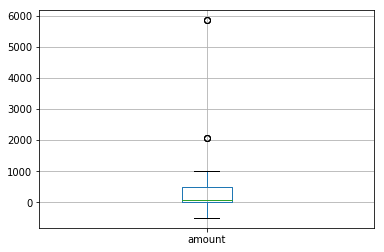

In [452]:
transaction_df.boxplot()

In [453]:
transaction_df.count()

date        48
name        48
amount      48
category    48
dtype: int64

In [462]:
# Group by to do high level pie chart

tran_summary_df = transaction_df.groupby(['category']).sum()
tran_summary_df

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


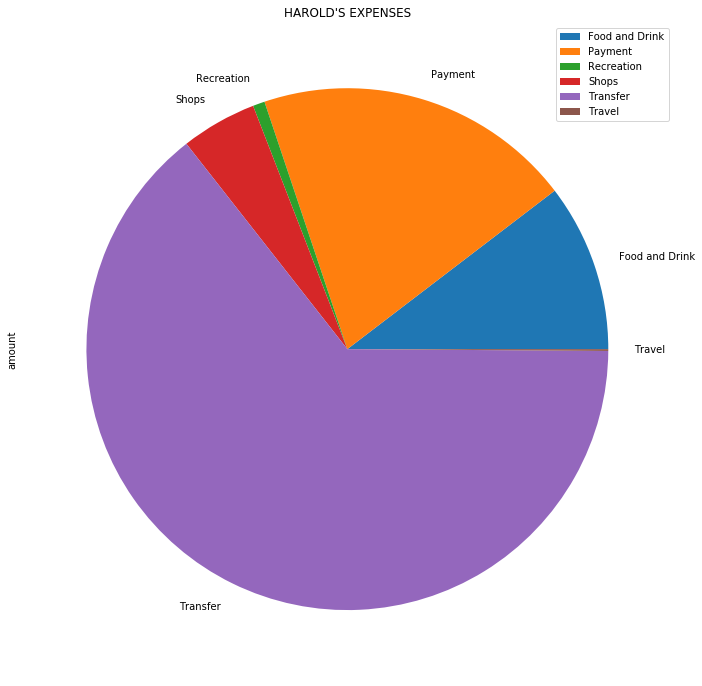

In [467]:
# Pie chart

plot = tran_summary_df.plot.pie(y='amount', figsize=(12, 12), title = "HAROLD'S EXPENSES")

### SPENDING PER MONTH BAR CHART

In [456]:
# Monthy spend bar chart

#transaction_df.plot.bar(figsize=(20,10), title = 'MONTHLY SPEND')

In [472]:
# Ensure date is datetimeindex

#transaction2_df = transaction_df
#transaction2_df.set_index('date')
#transaction2_df.head()

In [476]:
# derive month from the data frame

transaction2_df = transaction_df

In [493]:
#transaction_df.category = transaction_df.category.astype(str).str.split(',').str[0]

transaction2_df.date = transaction2_df.date.astype(str).str.split('-').str[1]
transaction2_df.date

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0     04
1     04
2     04
3     04
4     04
5     04
6     04
7     04
8     04
9     04
10    03
11    03
12    03
13    03
14    03
15    03
16    03
17    03
18    03
19    03
20    03
21    03
22    03
23    03
24    03
25    03
26    03
27    02
28    02
29    02
30    02
31    02
32    02
33    02
34    02
35    02
36    02
37    02
38    02
39    02
40    02
41    02
42    01
43    01
44    01
45    01
46    01
47    01
Name: date, dtype: object

In [494]:
# group by month
tran2_summary_df = transaction2_df.groupby(['date']).sum()
tran2_summary_df

,amount
date,
01,4084.83
02,10145.24
03,11145.24
04,6560.41


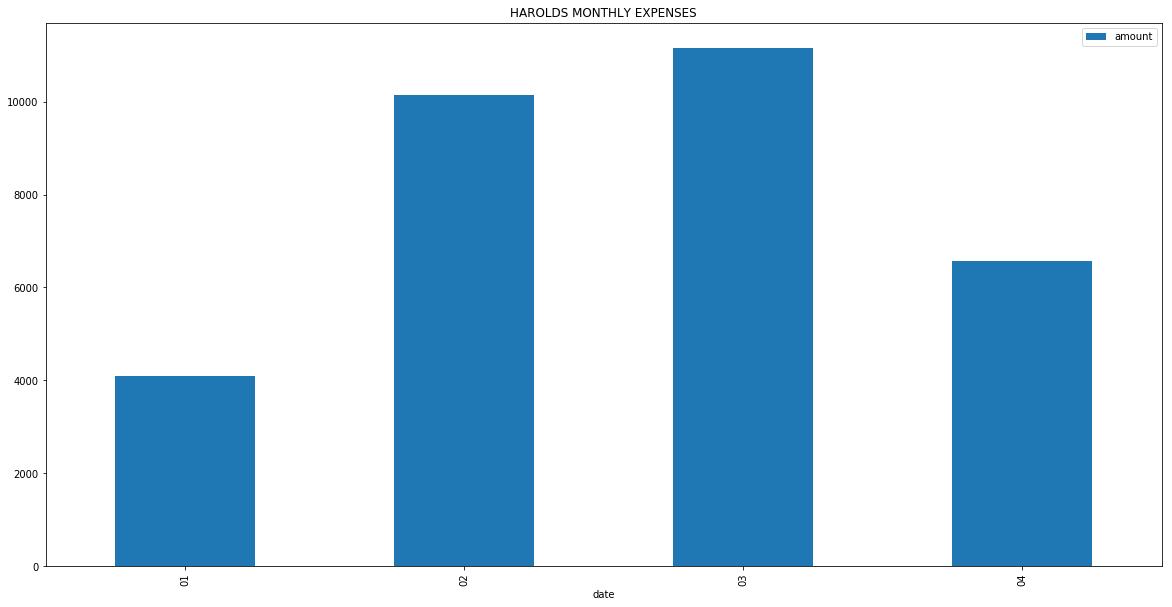

In [496]:
# Harold's monthly overall expenses

tran2_summary_df.plot.bar(figsize=(20,10), title = 'HAROLDS MONTHLY EXPENSES')

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [498]:
# TOTAL SPEND BY MONTH / CATEGORY

tran2_summary_df = transaction2_df.groupby(['date', 'category']).sum()
tran2_summary_df

amount
date category               
01   Food and Drink  1000.00
     Payment         2078.50
     Shops            500.00
     Travel           506.33
02   Food and Drink  1105.73
     Payment         2103.50
     Recreation        78.50
     Shops            500.00
     Transfer        6845.78
     Travel          -488.27
03   Food and Drink  1105.73
     Payment         2103.50
     Recreation        78.50
     Shops            500.00
     Transfer        6845.78
     Travel           511.73
04   Food and Drink   105.73
     Payment           25.00
     Recreation        78.50
     Transfer        6845.78
     Travel          -494.60

In [503]:
# NUMBER OF TRANSACTIONS FOR EACH CATEGORY

tran2_summary_df = transaction2_df.groupby(['category']).count()
tran2_summary_df

,date,name,amount
category,,,
Food and Drink,15,15,15
Payment,6,6,6
Recreation,3,3,3
Shops,3,3,3
Transfer,9,9,9
Travel,12,12,12


### Calculate the expenses per month

In [504]:
# TOTAL EXPENSES PER MONTH

tran2_summary_df = transaction2_df.groupby(['date']).sum()
tran2_summary_df

,amount
date,
01,4084.83
02,10145.24
03,11145.24
04,6560.41


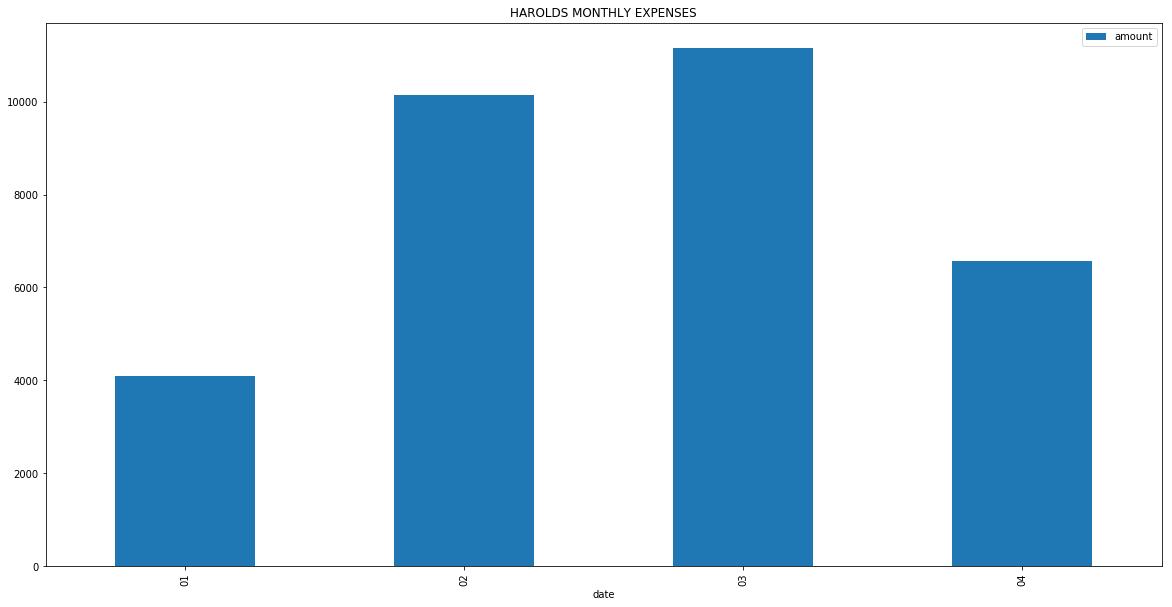

In [505]:
# PLOT OF TOTAL EXPENSES PER MONTH

tran2_summary_df.plot.bar(figsize=(20,10), title = 'HAROLDS MONTHLY EXPENSES')